# Sea Level Change Modelling

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [10]:
sealevel = pd.read_csv('sealevel.csv')

In [12]:
sealevel['date'] = pd.to_datetime(sealevel['date'])

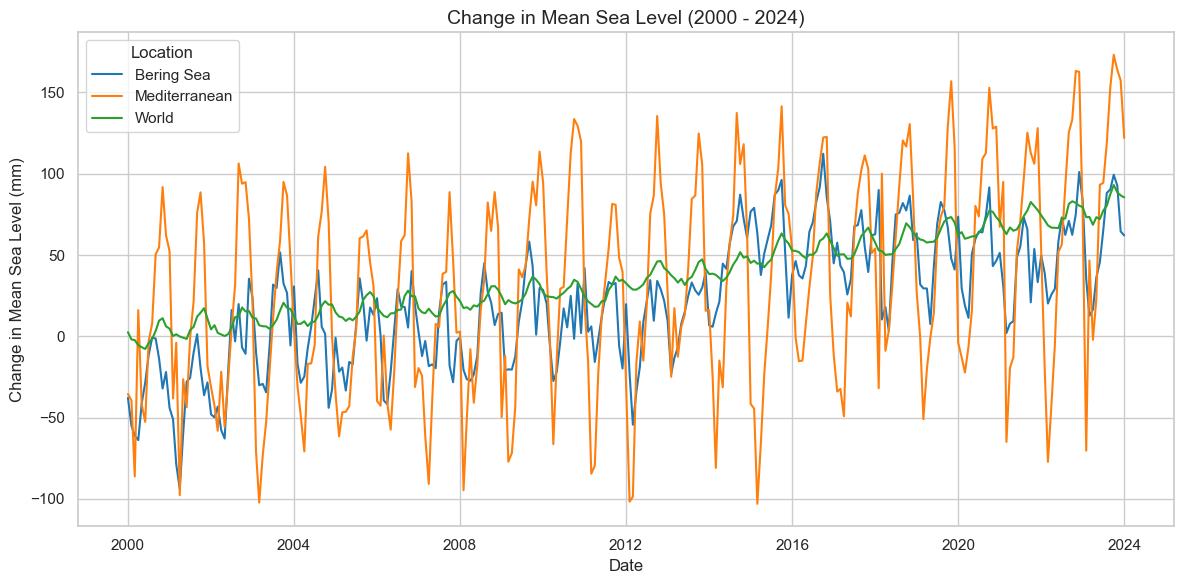

In [14]:
sns.set(style="whitegrid")

# Plot the time series of mean sea level changes for each location
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=sealevel,
    x='date',
    y='Change in Mean Sea Level (mm)',
    hue='Location',
    palette='tab10'
)

# Enhance plot readability
plt.title('Change in Mean Sea Level (2000 - 2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Change in Mean Sea Level (mm)', fontsize=12)
plt.legend(title='Location')
plt.tight_layout()

# Show the plot
plt.show()

In the Figure above, we can see a clear increase in change in mean sea level from 2000 to 2024, across all three locations.
As expected the Mediterranean and Bering Seas have volitile seasonal changes, with a year range of around 200mm and 70mm. Whereas, the world mean sea level, is much less volitile, as shows by its yearly range of around 10mm. 

Despite this, the mean sea level has steadily risen over the last 24 years, as showns by the Worlds change in mean sea level sitting around +80mm yearly, from its base point in 2000.

It's important to look at the long term when analysing this data, as its important to understand and capture the fluctuations caused by seasons.

## Regression Model

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sealevel['year'] = pd.to_datetime(sealevel['date']).dt.year
sealevel['month'] = pd.to_datetime(sealevel['date']).dt.month

locations = ["Bering Sea", "Mediterranean", "World"]
models = {}
results = {}

# Loop over each location
for location in locations:
    # Subset data for the location
    loc_data = sealevel[sealevel["Location"] == location]
    
    # Had issues with the Date column, so i'm creating time.
    loc_data['time'] = (pd.to_datetime(loc_data['date']) - pd.to_datetime('2000-01-01')).dt.days // 30  # Approximate months
    
    X = loc_data[['time']].values  # Predictor variable (time in months)
    Y = loc_data["Change in Mean Sea Level (mm)"].values  # Target variable (change in mean sea level)
    
    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X, Y)
    
    # Predicting values and calculate R^2 score
    y_pred = model.predict(X)
    r2 = r2_score(Y, y_pred)
    
    models[location] = model
    results[location] = {"R^2": r2}

# Displaying the R^2 values for each location in a table
r2_table = pd.DataFrame({location: [results[location]["R^2"]] for location in locations}, index=["R^2"])
print(r2_table.T)


                    R^2
Bering Sea     0.526528
Mediterranean  0.136573
World          0.937769


C:\Users\james\AppData\Local\Temp\ipykernel_2100\1686177507.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_data['time'] = (pd.to_datetime(loc_data['date']) - pd.to_datetime('2000-01-01')).dt.days // 30  # Approximate months
C:\Users\james\AppData\Local\Temp\ipykernel_2100\1686177507.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_data['time'] = (pd.to_datetime(loc_data['date']) - pd.to_datetime('2000-01-01')).dt.days // 30  # Approximate months
C:\Users\james\AppData\Local\Temp\ipykernel_

The R^2 values indicate that the model explains 94% of variation in the world location, 52% in the Bering sea and only 14% in the Mediterranean.
Despite this model, being simple, it captures long term variation more accurately. The Mediterranean's low score is becuase its extreme seasonal fluctuations arent fitted in this model.

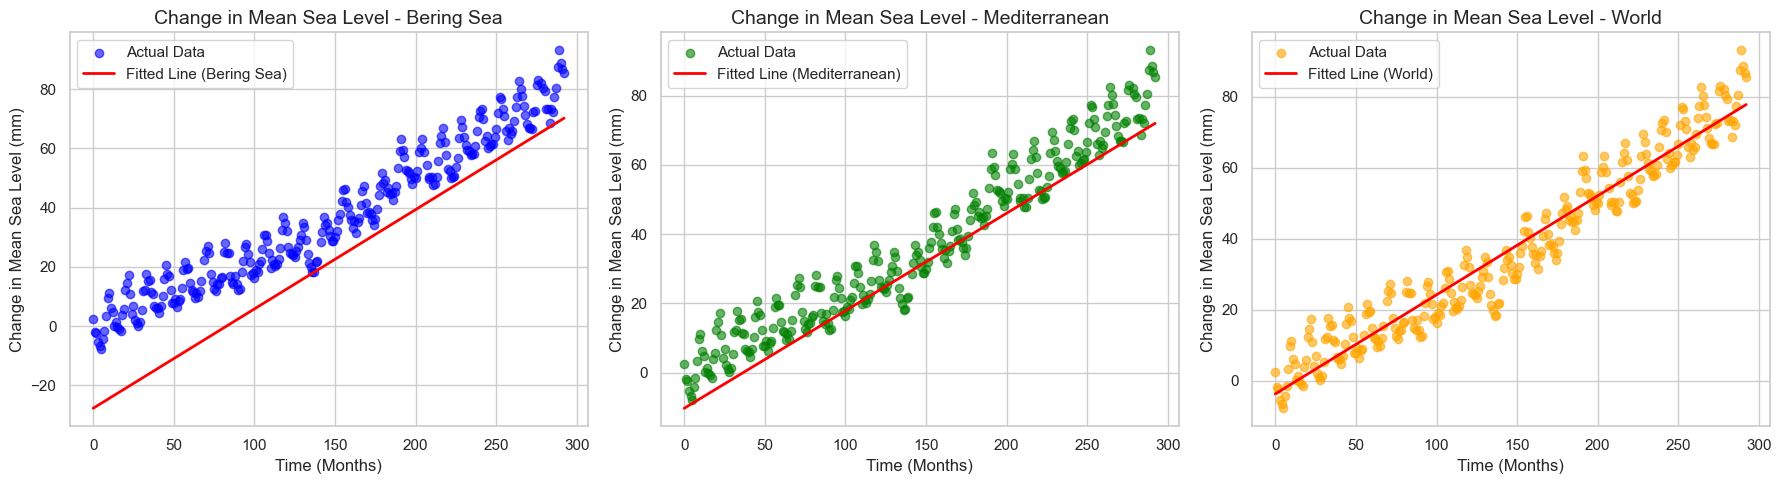

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

locations = ["Bering Sea", "Mediterranean", "World"]
colors = ['blue', 'green', 'orange']

for i, location in enumerate(locations):
    loc_data = sealevel[sealevel["Location"] == location]

    ax = axes[i]
    ax.scatter(X, Y, label="Actual Data", color=colors[i], alpha=0.6)
    
    # Fitted regression line
    y_pred = models[location].predict(X)
    ax.plot(X, y_pred, label=f"Fitted Line ({location})", color='red', linewidth=2)
    
    ax.set_title(f"Change in Mean Sea Level - {location}", fontsize=14)
    ax.set_xlabel("Time (Months)", fontsize=12)
    ax.set_ylabel("Change in Mean Sea Level (mm)", fontsize=12)
    ax.legend()

plt.tight_layout()
plt.show()


The graphs above are fitted with regression lines to reveal the underlying trends for each location. From these, we can infer that the mean sea level is increasing year after year across the globe. Among the locations, the World has the best-fitted regression line, suggesting that the model explains this trend most effectively for this location. In contrast, the regression line for the Bering Sea is not as well-fitted, indicating less accuracy in capturing the trend for this region. Nevertheless, all regression lines align with the expected upward trends, suggesting that the model predicts a continued year-on-year increase in mean sea level.

C:\Users\james\AppData\Local\Temp\ipykernel_2100\2411697653.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_data['time'] = np.arange(len(loc_data)) / 12
C:\Users\james\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\james\AppData\Local\Temp\ipykernel_2100\2411697653.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_data['time'] = np.arange(len(loc_data)) / 12
C:\Users\james\anacon

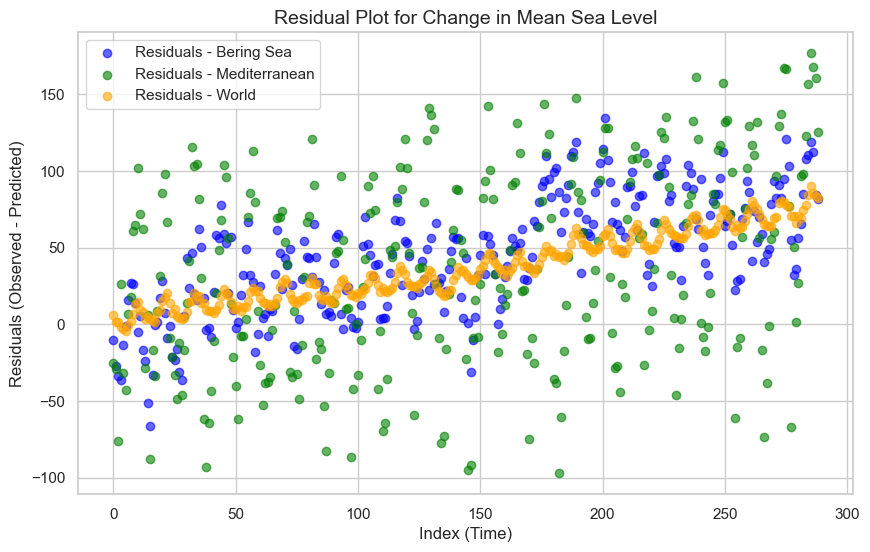

In [20]:
locations = ["Bering Sea", "Mediterranean", "World"]
colors = ['blue', 'green', 'orange']
residuals = []
labels = []

for i, location in enumerate(locations):
    loc_data = sealevel[sealevel["Location"] == location]
    loc_data['time'] = np.arange(len(loc_data)) / 12
    
    model = models[location]
    y_pred = model.predict(loc_data[['time']])
    residuals_for_location = loc_data["Change in Mean Sea Level (mm)"] - y_pred 
    residuals.append(residuals_for_location)
    labels.append(location)

plt.figure(figsize=(10, 6))
for i, location in enumerate(locations):
    plt.scatter(np.arange(len(residuals[i])), residuals[i], label=f'Residuals - {location}', alpha=0.6, color=colors[i])

plt.title('Residual Plot for Change in Mean Sea Level', fontsize=14)
plt.xlabel('Index (Time)', fontsize=12)
plt.ylabel('Residuals (Observed - Predicted)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


The graph above displays the residual data points across the three locations. As expected, the residuals for the Mediterranean and Bering Sea are wildly scattered. This was expected as we already know the model isn't well fitted for these locations. The World is better fitted as the points are closer to 0.